<a href="https://colab.research.google.com/github/Natalya7oct/Feature-selection/blob/master/FW_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from itertools import chain
from sklearn.decomposition import TruncatedSVD
from scipy.misc import derivative
import statistics
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
import scipy.optimize as opt


%matplotlib inline

*Задание* 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [0]:
raitings = [[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
            [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
            [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
            [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
            [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
            [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
            [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
            [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
            [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
            [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]]


a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [0]:
def distCosine (vecA, vecB):
  return np.dot(vecA, vecB) / math.sqrt(np.dot(vecA,vecA)) / math.sqrt(np.dot(vecB,vecB))

In [0]:
def fun_best_pair(raitings):
  for i in range(len(raitings)):
     min_similarity=1
     merged = chain(range(i), range(i+1, len(raitings)))
     for j in merged:
         if (distCosine(raitings[i],raitings[j])<=min_similarity or distCosine(raitings[j],raitings[i])<=min_similarity):
            min_similarity=min(distCosine(raitings[i],raitings[j]),distCosine(raitings[j],raitings[i]))
            best_pair=j
     print(i,' - user;', best_pair,' - best pair;', '%.3f' % min_similarity, ' - similarity')

In [0]:
fun_best_pair(raitings)

0  - user; 6  - best pair; 0.727  - similarity
1  - user; 7  - best pair; 0.800  - similarity
2  - user; 6  - best pair; 0.676  - similarity
3  - user; 4  - best pair; 0.692  - similarity
4  - user; 3  - best pair; 0.692  - similarity
5  - user; 6  - best pair; 0.740  - similarity
6  - user; 2  - best pair; 0.676  - similarity
7  - user; 2  - best pair; 0.763  - similarity
8  - user; 3  - best pair; 0.777  - similarity
9  - user; 6  - best pair; 0.792  - similarity



b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [0]:
def func_svd(raitings,i):
  svd = TruncatedSVD(n_components=i)
  raitings_reduced = svd.fit_transform(raitings)
  return raitings_reduced

In [0]:
raitings_reduced=func_svd(raitings,5)

In [0]:
fun_best_pair(raitings_reduced)

0  - user; 5  - best pair; 0.754  - similarity
1  - user; 9  - best pair; 0.834  - similarity
2  - user; 6  - best pair; 0.678  - similarity
3  - user; 4  - best pair; 0.711  - similarity
4  - user; 3  - best pair; 0.711  - similarity
5  - user; 0  - best pair; 0.754  - similarity
6  - user; 2  - best pair; 0.678  - similarity
7  - user; 2  - best pair; 0.825  - similarity
8  - user; 3  - best pair; 0.790  - similarity
9  - user; 6  - best pair; 0.803  - similarity


Вывод: приближение сохранило схожесть почти всех пользователей (для 7 из 10 пользователей).

Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать)

In [0]:
def fun(x):
  return math.tan(math.sin(x)+math.cos(2*x+3))**2

In [0]:
print(derivative(fun, 1))

57.06531269460301


Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [0]:
def f(x_1, a, b):
    return np.e**a * np.sin(b*x_1) + x_1

In [0]:
x = [0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ]

In [0]:
fx = [  0.        , -12.01819092, -18.90968634, -17.68786571,
        -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
        19.22059845,   9.48411207,  -3.22273056, -13.48576488,
       -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
        22.12489421,  24.20292139,  18.04522521,   6.33211092]

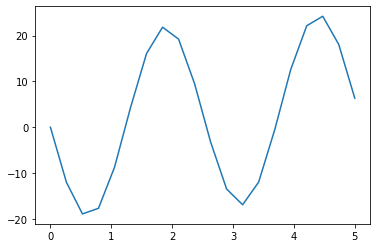

In [5]:
plt.plot(x, fx)
plt.show()

In [0]:
def error(params):
  error=0
  for i in range(len(x)):
    error=error+np.abs(fx[i] - f(x[i], params[0], params[1]))
  return error

In [9]:
bounds = [(-100, 100), (-100, 100)]
result = differential_evolution(error, bounds)
result

     fun: 1.2906631369880017e-05
 message: 'Optimization terminated successfully.'
    nfev: 2433
     nit: 78
 success: True
       x: array([ 3.        , 21.37610417])

In [10]:
params=[ 3.        , 21.37610417]
error(params)

1.331455389319558e-05

a=3, b=21.37610417 - эти значения минимизируют ошибку лучше всего


Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [0]:
elements = range(20)
probabilities = [0.05]*20
list_means=[]
for i in range(1000): 
  data=np.random.choice(elements, 50, p=probabilities)
  list_means.append(statistics.mean(data))

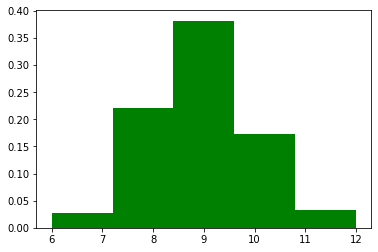

In [0]:
plt.hist(list_means, 5, density=True,color='Green')
plt.show()

Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

[1, 1]]

In [0]:
m = np.array([[1, 4],
              [1, 1]])
w, v = np.linalg.eig(m)
print(w, v)

[ 3. -1.] [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
